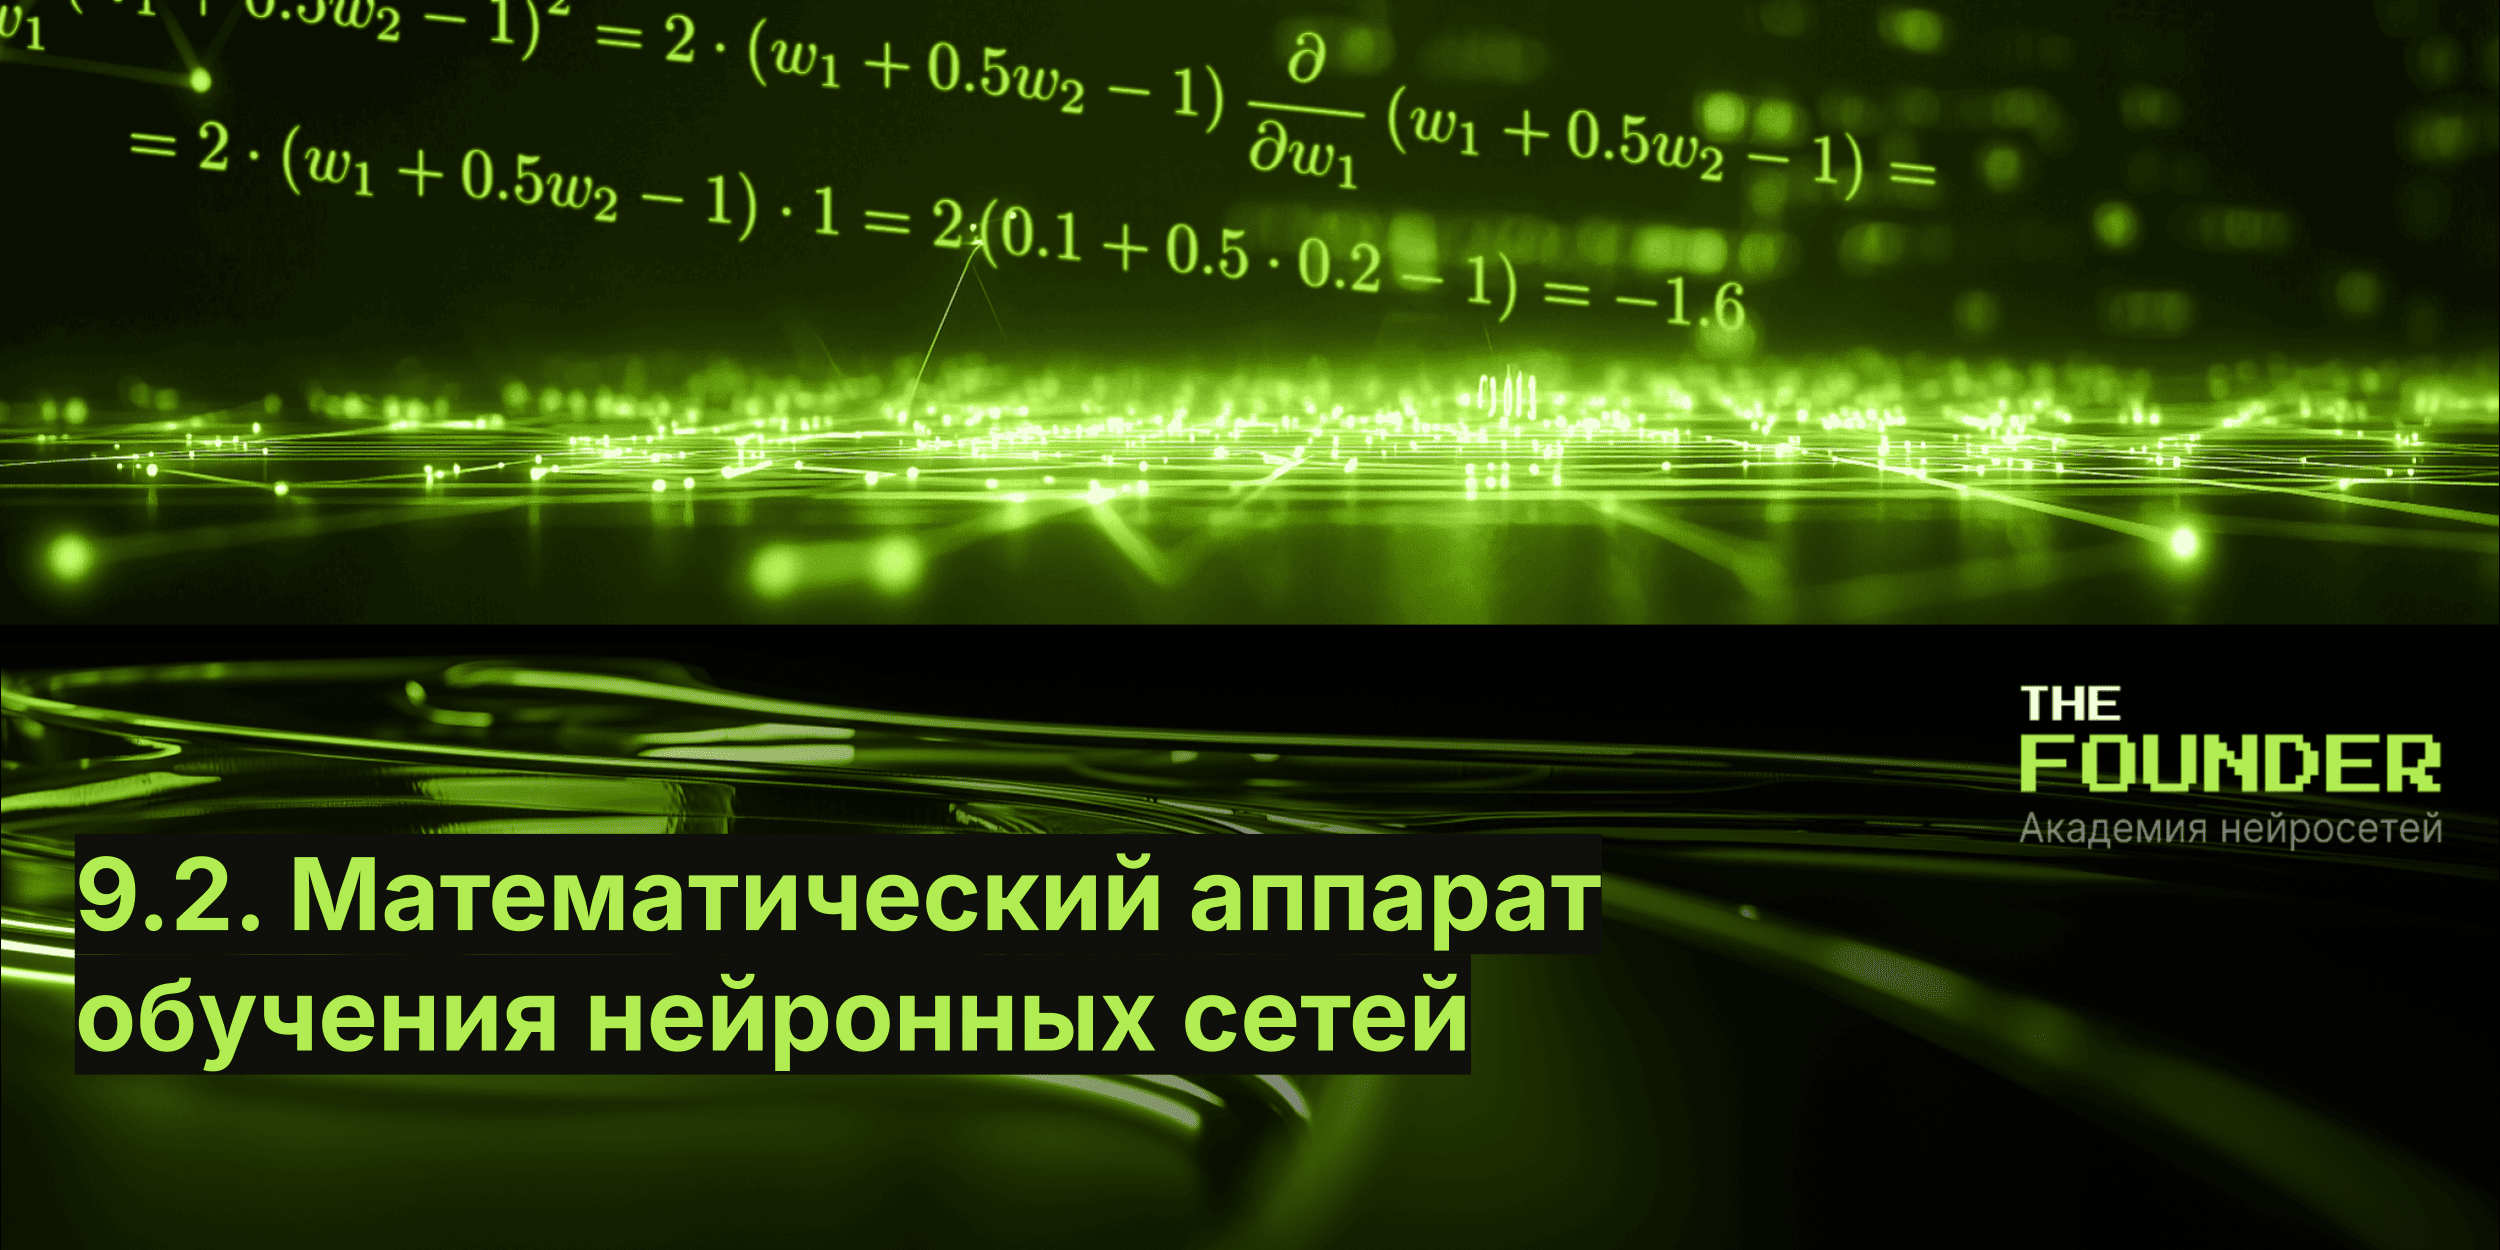

**Навигация по уроку**

1. [Краткая история нейронных сетей. Знакомство с многослойным персептроном](https://colab.research.google.com/drive/1-FEYLgNSN5kJyAOoaW9dOhDUABU8VJlc)
2. [Математический аппарат обучения нейронных сетей](https://colab.research.google.com/drive/1HGCh9dZHhgu2YPpFxm0IErl8mGM9OMsc#scrollTo=VtSc2Qgri-Yz)
3. [Обучение сети на примере TensorFlow](https://colab.research.google.com/drive/1Q8ioc9pkkaqGravu37C7jKw9OaG7cNL0)
4. [Домашняя работа](https://colab.research.google.com/drive/1bSAFxhE4EAEBkSDUABYwbOMK0FqwimqX)

В данной части урока мы поговорим о нескольких основополагающих для машинного
обучения вещах, приведем необходимые предварительные сведения о тех разделах математики, которые понадобятся нам для понимания процесса обучения, а на практической части урока пробежимся по всей этой математике с помощью библиотеки TensorFlow.

В дальнейшем в курсе мы все же будем пользоваться библиотекой Keras, которая является надстройкой над TensorFlow и прячет от разработчиков весь сложный математический аппарат обучения. Однако если ваша цель - профессиональная деятельность в сфере ИИ, то без глубоких математических знаний и понимания, что там происходит под капотом Keras, вам не обойтись.

Для начала нам необходимо познакомиться с терминологией встречающей в машинном обучении, а после переходить уже непосредственно к самому обучению. Это очень важно! Так как на собеседованиях, при устройстве на работу, с вами будут общаться на профессиональном языке и задавать вопросы в терминах предметной области. И не важно куда вы устраиваетесь: программистом, сталеваром или конюхом - первое впечатление о вас будет складываться по той терминологии, которой вы владеете. А после уже по опыту и навыкам!

Если вы не имеете технического образования, и вам что-то непонятно в этой части урока, смело пропускайте. В реальной работе, вам глубокая математика и не понадобится. А если и понадобится, то вы всегда можете вернуться к этой части урока и перечитать ее. А если в ваши обязанности будет входить оптимизация математических моделей, создание новых типов нейронных сетей, то помимо курса вам придется освоить множество других математических дисциплин в деталях: от линейной алгебры до дифференциальных уравнений. Такими задачами занимаются целые научные лаборатории, НИИ, исследовательские группы, но мы с вами практики, а не теоретики! Нам достаточно понимать, как все это работает, а математику оставить фреймворкам.  

И так приступим!

## Линейная алгебра без лишних слов

**Линейная алгебра** – краеугольный камень машинного и глубокого обучения. Она
дает математический аппарат для решения уравнений, используемых при построении моделей.
Прежде чем двигаться дальше, рассмотрим некоторые базовые понятия из этой
области и начнем со скаляра.




### Скаляр

В математике термин «скаляр» встречается в  основном в  контексте элементов
вектора. Скаляр – это вещественное число или, в  более общем случае, элемент
поля, над которым определено векторное пространство.
В информатике скаляр – синоним «переменной», т. е. область памяти вместе
с сопоставленным ей символическим именем. В этой области хранится неизвестная величина, называемая значением.

### Вектор

Если n – целое положительное число, то вектором называется n-множество или массив n чисел, называемых элементами, или скалярами.

Сказанное означает, что мы хотим создавать структуру данных, именуемую
вектором, посредством процесса векторизации. Количество элементов вектора называется его «порядком», или «длиной». Векторы могут также представлять
точки в n-мерном пространстве. При такой интерпретации длина вектора равна
расстоянию между представленной им точкой и началом координат.

В математических текстах векторы часто записываются в виде:

$$ x =
\begin{bmatrix}
x_1 \\
x_2 \\
... \\
x_n \\
\end{bmatrix}
$$

или

$$ x =
\begin{bmatrix}
x_1,&x_2,&...,& x_n\\
\end{bmatrix}.
$$

### Матрицы

Будем называть матрицей группу векторов одинаковой размерности (с одинаковым числом элементов). Таким образом, матрица – это двумерный массив, состоящий из строк и столбцов.
Матрицей размера $n×m$ называют матрицу, имеющую n строк и m столбцов.
Матрицы – основная структура в линейной алгебре и машинном обучении, в чем мы убедимся когда перейдем к самим нейронным сетям.

Пример матрицы 3х3:

$$
A = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

### Тензор

Тензором называется многомерный массив. Вектор можно считать частным случаем тензора.
В тензорах строки расположены вдоль оси y, а столбцы – вдоль оси x. Каждая ось
является измерением, и у тензоров имеются дополнительные измерения, помимо
x и y. Тензор также характеризуется рангом. Так, скаляр имеет ранг 0, вектор –
ранг 1, а матрица – ранг 2. Структуры ранга 3 и выше называются тензорами. Мы их там будем называть, ориентируясь на то, как они вошли в мир ИИ с приходом TensorFlow.

Если среди вас есть математики и для вас тензор — это элемент тензорного пространства, то есть по сути линейное преобразование между многомерными линейными пространствами. Преобразования тоже образуют линейное пространство, а числа — это всего лишь их координатные представления, они зависят от выбора базиса и могут меняться при том, что сам тензор как геометрический объект останется неизменным. Правда сложно и не понятно?

Так что в TensorFlow, да и в целом в сложившейся терминологии ИИ, тензор — это не настоящий тензор, а именно многомерный массив, никакого мотивированного геометрией отношения эквивалентности на них нет, просто слово красивое. Но раз уж это слово используется насквозь во всей документации и даже в названии TensorFlow, избежать его нам не удастся.

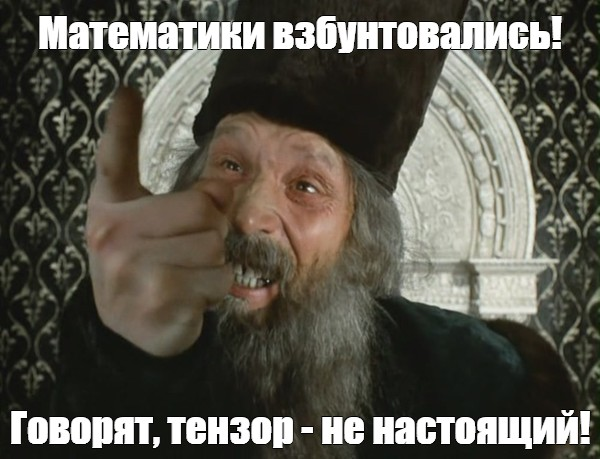

### Гиперплоскость

Еще один полезный объект из линейной алгебры – гиперплоскость. В геометрии
гиперплоскостью называется подпространство, размерность которого на единицу меньше размерности объемлющего пространства. В трехмерном случае размерность гиперплоскости равна 2, а  в  двумерном гиперплоскостью считается
одномерная прямая.

Гиперплоскость делит n-мерное пространство на две части и потому имеет
полезные применения в  приложениях классификации. Оптимизация параметров гиперплоскости – ключевая идея линейного моделирования.

### Скалярное произведение

В машинном обучении часто встречается операция скалярного произведения
(иногда ее еще называют «внутренним произведением»). Скалярное произведение применяется к двум векторам одинаковой длины и возвращает одно число.
Для этого соответственные элементы векторов перемножаются, а произведения
суммируются. Не вдаваясь в математические детали, отметим, что в этом
числе закодировано много информации.

Прежде всего скалярное произведение показывает, насколько велики отдельные элементы обоих векторов. Произведение двух векторов с большими элементами будет большим, а с малыми – малым. Если применить к значениям элементов математическую процедуру нормировки, т. е. принимать во внимание не
абсолютные, а относительные значения, то скалярное произведение векторов будет мерой их похожести. Скалярное произведение нормированных векторов называется косинусным коэффициентом, или коэффициентом Отиаи.

### Поэлементное произведение

На практике также часто встречается операция поэлементного произведения, или
произведения Адамара. Она применяется к двум векторам одинаковой длины
и возвращает вектор той же длины, каждый элемент которого равен произведению соответственных элементов векторов-сомножителей.


### Внешнее произведение

Оно называется еще тензорным произведением двух векторов. Каждый элемент
вектора-столбца умножается на все элементы вектора-строки, в результате чего
создается новая строка в результирующей матрице.

In [ ]:
###########

### Преобразование данных в векторы

В машинном обучении и  науке о  данных требуется анализировать данные самых разных типов. Ключевое требование – возможность представить тип данных в виде вектора. В машинном обучении рассматривается много типов данных (текст, временные ряды, звук, изображения, видео и т. п.).

Так почему бы не подать на вход алгоритма обучения исходные данные – и пусть
обрабатывает? Проблема в том, что машинное обучение основано на линейной
алгебре и решении систем уравнений. Алгоритмы машинного обучения "ожидают" получить на входе числа с плавающей точкой, поэтому нужно каким-то образом преобразовать исходные данные во множество чисел с плавающей точкой. Поэтому, как вы скоро увидите, работа с любым датасетом начинается с преобразования данных в тензор, содержащий числа с плавающей точкой.

### Решение систем уравнений

В линейной алгебре нас интересует решение систем линейных уравнений вида:

$Ax = b$,

где $A$ – матрица, образованная входными векторами-строками, а $b$ – вектор-столбец меток, соответствующих каждой строке матрицы $A$.

Пусть у нас есть первые три строки датасета:
```
1.0 1:0.75   2:0.416 3:0.702 4:0.565
2.0 1:0.66   2:0.5   3:0.914 4:0.695
0.0 1:0.4583 2:0.33  3:0.80  4:0.739
```

Если представим их в линейно-алгебраической форме, то получим:

| Столбец 1 | Столбец 2 | Столбец 3 | Столбец 4 |
| --- | --- | --- | --- |
| 0.75 | 0.416 | 0.702 | 0.565 |
| 0.66 | 0.5 | 0.914 | 0.695 |
| 0.4583 | 0.33 | 0.80 | 0.739 |

Эта числовая матрица и есть переменная $A$ в нашем уравнении, а независимые
значения в каждой строке считаются **признаками** входных данных.

В машинном обучении **признаком** называется любой столбец матрицы $A$, рассматриваемый как независимая переменная. В качестве признаков можно брать непосредственно исходные данные, но обычно производится некоторое преобразование
исходных данных в форму, более подходящую для моделирования.

Мы хотим найти для каждого столбца такие коэффициенты, которые после
умножения и суммирования дадут вектор-столбец меток b. В исходном датасете были такие метки:
```
Метки
1.0
2.0
0.0
```

Вышеупомянутые коэффициенты образуют вектор-столбец x (называемый
также вектором параметров):



<table>
  <tr>
    <th colspan="4">Обучающие записи (A)</th><th> </th><th>Вектор параметров (x) </th><th> </th><th>Выход (b)</th>
  </tr>
  <tr>
    <td>0.75</td>
    <td>0.416</td>
    <td>0.702</td>
    <td>0.565</td>
    <td rowspan="3" align="center"><b>*</b></td>
    <td align="center"><b>?</b></td>
    <td rowspan="3" align="center"><b>=</b></td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>0.66</td>
    <td>0.5</td>
    <td>0.914</td>
    <td>0.695</td>
    <td align="center"><b>?</b></td>
    <td>2.0</td>
  </tr>
  <tr>
    <td>0.4583</td>
    <td>0.33</td>
    <td>0.80</td>
    <td>0.739</td>
    <td align="center"><b>?</b></td>
    <td>0.0</td>
  </tr>
  
</table>

Говорят, что эта система уравнений совместна, если существует вектор параметров $x$ – такой, что решение можно записать в виде:

$x = A^{–1}b$.

Переменная $A^{–1}$ – это матрица, обратная $A$, которая вычисляется с помощью процедуры обращения матрицы. Учитывая, что не все матрицы обратимы, нам нужен такой метод решения уравнения, который не прибегает к обращению матрицы. Один из таких методов называется разложением (или декомпозицией) матрицы. Примером может служить LU-разложение матрицы $A$. Рассмотрим также общие методы решения систем линейных уравнений, помимо разложения матриц.

### Методы решения систем линейных уравнений

Существуют два подхода к решению систем линейных уравнений:

* **прямые методы**  – заключается в  применении фиксированных вычислений, объем которых известен заранее.

* **итеративные методы** – заключается в нахождении последовательных приближений к вектору параметров х, при этом процесс прекращается, как только будут выполнены заранее заданные условия завершения.

Прямые методы особенно эффективны, если все обучающие данные (A и  b) помещаются в  памяти одного компьютера.

Хорошо известными примерами прямых методов являются метод исключения Гаусса и метод нормальных уравнений.

Итеративные методы особенно эффективны, когда данные не помещаются в оперативную память одного компьютера, а загрузка записей с диска в цикле позволяет включить в модель гораздо больший объем данных. Канонический пример
итеративного метода, повсеместно встречающийся в  современном машинном
обучении, – стохастический градиентный спуск (СГС), мы обсудим его немного позже. Также стоит упомянуть метод сопряженных градиентов и метод чередующихся наименьших квадратов. Итеративные методы доказали свою эффективность в горизонтально масштабируемых конфигурациях, когда весь набор данных распределен между машинами из одного кластера и вектор параметров периодически усредняется по всем агентам, а затем обновляется на каждом локальном агенте моделирования.


In [ ]:
############

## Только самая необходимая статистика

Мы приведем ровно столько сведений из области статистики, сколько необходимо, чтобы двигаться дальше. Курс статистики всегда начинается с вероятности.

### Вероятность

По определению, вероятность события E – число от 0 до 1. Вероятность 0 означает,
что событие E вообще не может произойти, а вероятность 1 – что оно произойдет
наверняка. Часто вероятность выражается в виде числа с плавающей точкой, но иногда и в виде процентной величины от 0 до 100%: вероятность не может
быть меньше 0 и больше 100 %. Например, вероятность 0.35 можно выразить как
35% (0.35×100 == 35%).

Базовый пример измерения вероятности – наблюдение за тем, сколько
раз выпали орел и  решка при подбрасывании правильной монеты (такой, что
каждая сторона выпадает с  вероятностью 0.5). Вероятность выборочного пространства всегда равна 1, потому что оно представляет все возможные исходы
испытания. Как мы видим на примере двух исходов (выпадение орла и решки),
0.5 + 0.5 = 1.0, потому что полная вероятность выборочного пространства должна
быть равна 1.

Вероятность события записывается в виде:

$P(E) = 0.5$.

Эта формула читается так:
```
Вероятность события E равна 0.5.
```

Понятие вероятности является центральным для нейронных сетей и глубокого обучения в силу своей роли в выделении признаков и классификации – двух
основных функций глубоких нейронных сетей.

#### Вероятность и шанс

Начинающие изучать статистику и машинное обучение часто путают смысл слов «вероятность» и «шанс». Давайте с ними разберемся.

Вероятность события E определяется следующим образом:
```
P(E) = (Число благоприятных для E исходов)/(Общее число исходов).
```

Так, вероятность вытянуть туза (4 штуки) из колоды карт (52 штуки) равна:
$4/52 = 0.077$.
С другой стороны, шанс (odds) определяется следующим образом:
```
(Число благоприятных для E исходов) : (Число неблагоприятных для E исходов).
```
В примере с картами «шанс вытянуть туза» равен:
$4 : (52 – 4) = 1/12 = 0.0833333...$
Отличие – в знаменателе: «общее число исходов» и «число неблагоприятных для E
исходов».



```
# Выбран кодовый формат
```

#### Определения вероятности: частотный и байесовский подходы

В статистике имеются два разных подхода к определению вероятности: **байесовский** и **частотный**.

Сторонники частотного подхода считают, что говорить о  вероятности имеет смысл
только в контексте повторяющихся измерений. Измеряя некую величину, мы наблюдаем небольшие вариации из-за физических особенностей оборудования, исполь­зуемого для сбора данных. При многократном повторении измерения частота конкретного значения определяет его вероятность.

При байесовском подходе вероятность связывают с достоверностью утверждений.
Вероятность характеризует степень нашей уверенности в том, каким будет результат
измерения. Сторонники байесовского подхода считают, что наши знания о событии
по сути своей связаны с его вероятностью.

Сторонники частотного подхода полагаются на большое число слепых испытаний
и только после этого готовы дать оценку случайной величины. А сторонники байесовского подхода имеют дело с  «верой» (математическим «распределением») относительно случайной величины и обновляют эту веру по мере поступления новой
информации.

#### Условные вероятности

Если мы хотим знать, какова вероятность данного события при условии, что произошло некоторое другое событие, то говорим об условной вероятности. В литературе условная вероятность записывается в виде:

$P(E|F)$,

где $E$ – событие, вероятность которого нас интересует; $F$ – событие, которое уже произошло.

В качестве примера рассмотрим тот факт, что для человека с нормальной частотой
сердечных сокращений вероятность получить инфаркт ниже:
```
P(инфаркт | плохой пульс) > P(инфаркт | хороший пульс).
```
Иногда второе событие $F$ называют «условием». Условная вероятность представляет интерес для машинного и глубокого обучений, потому что часто нам
важно знать, как взаимодействуют различные факторы. В контексте машинного
обучения мы обучаем классификатор путем определения условной вероятности
$P(E|F)$, где $E$ – метка, а $F$ – ряд атрибутов сущности, для которой мы хотим предсказать $E$. Примером может служить предсказание вероятности инфаркта ($E$), если известны результаты измерений для каждого пациента ($F$).

#### Теорема Байеса

Одно из основных применений условных вероятностей дает теорема (или формула)
Байеса. В медицине она применяется для вычисления вероятности того, что пациент,
сдавший положительный анализ на некоторое заболевание, действительно болен им.

Формула Байеса для двух событий A и B имеет вид:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

#### Апостериорная вероятность

В байесовской статистике апостериорной вероятностью случайного события называется условная вероятность после наблюдения факта. Апостериорное распределение вероятности определяется как распределение вероятности неизвестной
величины, обусловленное фактическими данными, собранными в результате эксперимента и рассматриваемыми как случайная величина. Как эта идея применяется на практике, мы увидим ниже на примере функции активации softmax,
которая преобразует входные значения в апостериорные вероятности.

In [ ]:
###########

#### Распределения вероятности

Распределение вероятности – это описание стохастической структуры случайных
величин. В статистике мы высказываем предположения о распределении данных,
чтобы делать о них какие-то выводы. Нам нужна формула, описывающая частоту
наблюдаемых значений величины с данным распределением. Часто встречается нормальное распределение (называемое также гауссовым, или колоколообразной
кривой). Мы хотим аппроксимировать набор данных распределением, поскольку
если набор данных действительно близок к распределению, то о данных можно
высказывать гипотезы, исходя из теоретических свойств распределения.
Выделяют непрерывные и дискретные распределения. Дискретная случайная величина может принимать значения из дискретного множества, а непрерывная –
значения из некоторого диапазона. Нормальное распределение – пример непрерывного распределения. Примером дискретного может служить биномиальное
распределение.
Нормальное распределение было открыто Карлом Гауссом, математиком и физиком, жившим в XVIII веке. Оно полностью определяется своим средним и стандартным отклонением и имеет одинаковую характерную форму для любых параметров.


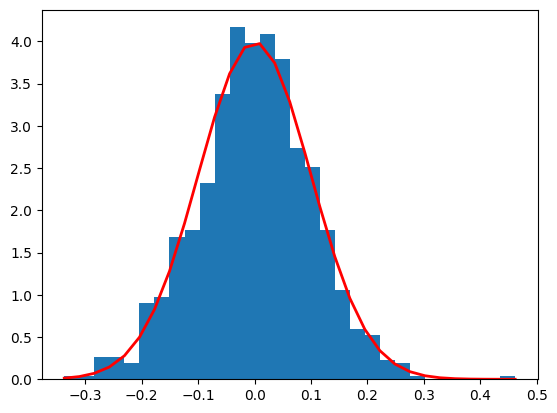

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mu, sigma = 0, 0.1 # среднее значение и стандартное отклонение
s = np.random.normal(mu, sigma, 1000) # Нормальное распределение 1000 точек


count, bins, ignored = plt.hist(s, 30, density=True) # Распределение в виде гистограммы
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r') # Построение функции плотности вероятности
plt.show()




Из других распределений, встречающих в машинном обучении, отметим:
* биномиальное распределение;
* обратное нормальное распределение;
* логнормальное распределение.

Важно понимать, как распределены обучающие данные, чтобы правильно векторизовать данные для моделирования.

Если размер выборки достаточно велик, то выборочное распределение выборочных
средних аппроксимируется нормальным распределением. Такое утверждение получило название **центральной предельной теоремы**. Это справедливо независимо от распределения генеральной совокупности, из которой производилась выборка.
Это позволяет делать статистические выводы, применяя критерии, основанные на
приближенной нормальности среднего. И  выводы остаются справедливыми, даже
если выборка произведена не из нормально распределенной генеральной совокупности.


 ### Выборка и генеральная совокупность

Под генеральной совокупностью понимается все множество данных, которые мы
собираемся изучать или моделировать в эксперименте. Примером может служить
«множество всех Python-программистов республики Татарстан».
Выборкой называется подмножество генеральной совокупности, которое предположительно достаточно точно представляет распределение данных, не внося
смещения (обусловленного способом извлечения выборки).

#### Методы с перевыборкой

**Бутстрэппинг** и **перекрестная проверка** – два типичных статистических метода с  перевыборкой, полезных в  машинном обучении.

В  случае бутстрэппинга мы случайным образом выбираем примеры из другой выборки с целью сгенерировать новую выборку, в которой представители каждого класса были бы сбалансированы. Это полезно при моделировании набора данных с сильно разбалансированными классами.

Перекрестная проверка позволяет оценить, насколько хорошо обобщается
обученная модель. Весь набор данных разбивается на N порций, а затем каждая
порция разделяется на обучающий и тестовый наборы. Сначала модель обучается на обучающих наборах, а  затем проверяется на тестовых. Порции меняются
местами, пока не будут исчерпаны все варианты. На количество порций не налагается никаких ограничений, но на практике обычно берут 10 порций, это дает
хорошие результаты. Нередко часть данных резервируют под контрольный набор,
используемый во время обучения.

#### Смещение выборки

Смещение возникает, когда метод выборки не обеспечивает надлежащую рандомизацию, вследствие чего выборка оказывается нерепрезентативной для моделируемой генеральной совокупности. Мы должны помнить о смещении, производя перевыборку из набора данных, чтобы не внести искажений в модель, что
приведет к снижению ее верности на данных из большей генеральной совокупности.

#### Правдоподобие

Обсуждая возможность события, мы не указываем его числовую вероятность,
а  употребляем менее формальный термин – правдоподобие. Обычно мы имеем
в виду, что событие может произойти с довольно высокой вероятностью, но все
же не наверняка. На событие могут повлиять пока еще не наблюдавшиеся факторы. Но в целом слово «правдоподобие» используется как неформальный синоним
«вероятности».

In [ ]:
###########

## Машинное обучение в терминах линейной алгебры и математической статистики

Выше, мы говорили о решении систем линейных уравнений и ввели обозначение $Ax = b$. По существу, машинное обучение сводится к алгоритмам,
которые минимизируют погрешность решения этого уравнения посредством оптимизации.

Оптимизация означает, что мы изменяем элементы вектора параметров $x$, пока
не найдем такой набор значений, при котором получается наилучшее приближение к значениям $b$. Весовая матрица корректируется после вычисления функции
потерь (основанной на расхождении с вектором-столбцом $b$), т. е. ошибки, порожденной сетью. Матрица ошибок, приписывающая некоторую часть потери каждому весу, умножается на сами веса.


Основными задачами машинного обучения принято считать задачи: регресcии, классификации и кластеризации. Коротко коснемся, каждой из них.

### Регрессия

Термин «регрессия» относится к функциям, пытающимся предсказать вещественное значение. Функции такого типа оценивают зависимую величину, зная независимую.

Наиболее распространена линейная регрессия, в основе которой лежит идея отыскании функции, описывающей связь между $x$ и $y$, так чтобы для известных значений $x$ предсказанные ей значения $y$ были верны.

Предсказание, порождаемое линейной регрессионной моделью, является линейной комбинацией коэффициентов (вектора параметров $x$) и  входных величин
(входного вектора). Это можно выразить в виде следующего уравнения:
$$
y = a + Bx,
$$
где $a$ – свободный член, $B$ – входные признаки, $x$ – вектор параметров.

В скалярном виде уравнение записывается так:
$$
y = a + b_0 * x_0 + b_1 * x_1 + ... + b_n * x_n.
$$

Простой пример задачи линейной регрессии – предсказание месячных расходов на бензин на основании длины маршрута. В данном случае сумма, уплаченная на заправке, является функцией расстояния, которое вы проехали. Стоимость бензина – зависимая величина, а длина маршрута – независимая. Мы можем связать эти величины функциональной зависимостью:
$$
стоимость = f (расстояние).
$$

Это позволяет дать разумный прогноз расходов на бензин в зависимости от
длины поездки.

Визуально линейную регрессию можно представить как отыскание прямой линии, которая проходит максимально близко к  максимально возможному числу
экспериментальных точек.


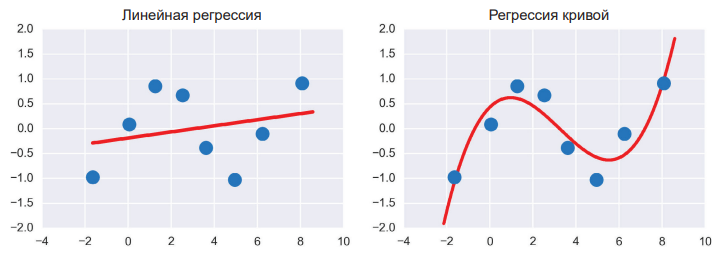



Определение «линейная» относится к попытке подогнать некоторую прямую линию к нашим входным данным, как это показано на левом графике.
Прямая линия предпочтительна из-за ее простоты, но в этом примере она не
слишком хорошо описывает данные. Наши данные поднимаются и опускаются
относительно нее, и прямая линия не охватывает их. Это не самая плохая аппроксимация, но и не самая лучшая.
В качестве альтернативы мы можем использовать более сложную форму регрессии, применив более сложный тип кривой, как показано на правом графике. Что обеспечит лучшую аппроксимацию данных, но потребуется больше вычислительных ресурсов.

Подгонкой (*fitting*), или аппроксимацией, называется нахождение функции $f(x)$,
значения которой близки к измеренным значениям $y$.

Мы можем связать эту функцию с  приведенным выше уравнением $Ax = b$, где
$A$ – признаки для всех входных примеров модели. Каждая входная запись – строка матрицы $A$. Вектор-столбец $b$ – известные метки, соответствующие входным записям. Применяя некоторую функцию ошибок и метод оптимизации (например, СГС), мы можем найти такой набор параметров $x$, который минимизирует отклонение от истинных меток на всем множестве входных данных.

Если линейная регрессия имеет дело с прямыми линиями, то нелинейная аппроксимация – со всем остальным, чаще всего с полиномами от $x$ степени, большей 1. Поэтому машинное обучение, особенно классическое, часто описывают как «подбор аппроксимирующей кривой». Точная аппроксимация означает, что кривая проходит через все экспериментальные точки. Но точная аппроксимация – обычно очень плохой результат, поскольку это означает, что модель идеально подогнана к обучающему набору и за его пределами не имеет почти никакой предсказательной силы, т.е. не обобщается. Это как студент, который не понял тему, но ее хорошо "вызубрил", сдал и через неделю забыл. Все что не обобщается, то быстро забывается.

In [ ]:
###########

### Классификация

Под классификацией понимают моделирование, цель которого – разделить классы данных на основе некоторого множества входных признаков. Если регрессия
отвечает на вопрос «сколько», то классификация – на вопрос «какого вида».

Зависимая величина $y$ не числовая, а категориальная.

Самая простая форма классификации – бинарный классификатор, порождающий на выходе одну из двух меток (всего два класса: 0 и 1). Результатом классификации может быть также число с плавающей точкой от 0.0 до 1.0, означающее степень уверенности. В этом случае требуется задать пороговую величину (обычно
0.5), определяющую границу между двумя классами. В литературе классы обычно
называют положительным (например, 1.0) и отрицательным (например, 0.0).

Вот несколько примеров бинарной классификации:
* имеется у пациента некоторое заболевание или нет;
* является почтовое сообщение спамом или нет;
* является банковская транзакция мошеннической или законной.

Существуют модели классификации не только с двумя, но и с N метками, когда мы вычисляем для каждой метки оценку, а затем в качестве результирующей
выбираем метку с  наивысшей оценкой. Мы вернемся к  этой теме, когда будем
говорить о нейронных сетях с несколькими выходами.

### Кластеризация

**Кластеризация** – это метод обучения без учителя, в котором измеряется расстояние между объектами и похожие объекты собираются вместе. В конце процесса
объекты, концентрирующиеся вокруг n-центроидов, считаются принадлежащими
одной группе – кластеру. Метод K-средних – один из самых известных алгоритмов
кластеризации в машинном обучении.

## Оптимизация


Как уже отмечалось, алгоритмы оптимизации в первую очередь решают проблему
недообучения, т. е., взяв линию, которая плохо аппроксимирует данные, стараются преобразовать ее так, чтобы аппроксимация стала лучше.

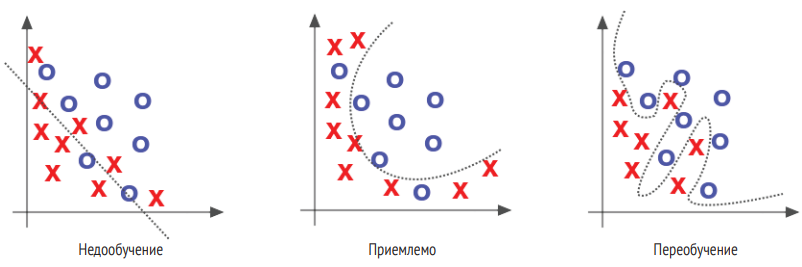

На графике слева, прямая линия, пересекающая диаграмму рассеяния, пример недообучения.

Если линия аппроксимирует данные слишком хорошо, то мы имеем противоположную проблему - переобучение (на графике справа).

Устранить недообучение - более приоритетная задача, но в машинном обучении много усилий тратится на то, чтобы воспрепятствовать чрезмерно близкой подгонке к данным.

Говоря, что модель переобучена на наборе данных, мы имеем в виду, что частота ошибок на обучающих данных, возможно, и мала, но модель плохо обобщается на всю интересующую нас генеральную совокупность.
По-другому объяснить суть переобучения можно, представив себе вероятные
распределения данных. Обучающий набор, который мы пытаемся аппроксимировать линией, - это просто выборка из большого неизвестного множества, и если
мы хотим, чтобы модель имела предсказательную силу, то линия, аппроксимирующая эту выборку, должна столь же хорошо аппроксимировать и все множество.
Поэтому мы должны предположить, что наша выборка более-менее репрезентативна для всего множества.

Процесс корректировки весов для порождения все более точных гипотез о  данных называется параметрической оптимизацией. Его можно
рассматривать как научный метод. Мы формулируем гипотезу, сравниваем ее
с действительностью и либо уточняем, либо заменяем гипотезу, так чтобы добиться лучшего описания реальных явлений. Этот процесс повторяется многократно.
Всякий набор весов представляет собой одну гипотезу о смысле входных данных, т. е. о том, как они соотносятся с информацией, заключенной в метках. Веса –
это представление заключений о корреляции между входами сети и выходными
метками. Все возможные веса и их комбинации можно рассматривать как пространство гипотез для данной задачи. Попытка сформулировать наилучшую гипотезу сводится к поиску в этом пространстве, а поиск производится с помощью алгоритмов оптимизации и функций ошибок. Чем больше параметров, тем обширнее пространство поиска. Значительная часть процесса обучения заключается в том, чтобы решить, какие параметры можно игнорировать, а какие играют важную роль.

> **Решающая граница и гиперплоскости.** Под «решающей границей» мы понимаем n-мерную гиперплоскость, образованную вектором параметров при линейном моделировании.

Аппроксимация данных линией путем измерения ее **стоимости** (т. е. расстояния до экспериментальных точек) - это и есть смысл машинного обучения. Чтобы линия более-менее прилично аппроксимировала данные, следует минимизировать суммарное расстояние от нее до всех точек. Мы минимизируем сумму расстояний между точкой $x$, принадлежащей линии, и соответствующей ей экспериментальной точкой $y$.

В трехмерном пространстве можно представить ошибку как ландшафт, состоящий из гор и долин, а алгоритм оптимизации – как слепого альпиниста, на ощупь исследующего склон. Алгоритм оптимизации, например градиентный спуск, информирует альпиниста о направлении понижения склона, чтобы он знал, куда поставить ногу.

Задача состоит в том, чтобы найти веса, минимизирующие разность между тем,
что предсказывает сеть ($\hat{b}$ - произведение $A$ и $x$), и заведомо правильными тестовыми метками $b$. Вектор параметров $x$ - это и есть искомые веса.

Верность сети является функцией входов и параметров, а скорость приближения
к верным значениям параметров – функцией гиперпараметров.

> **Гиперпараметры.** В машинном обучении имеются как параметры модели, так и параметры, которые мы настраиваем, чтобы сеть обучалась быстрее и лучше. Эти настраиваемые параметры называются гиперпараметрами, они управляют оптимизацией и выбором модели в ходе обучения с применением алгоритма обучения.

> **Сходимость.** Под сходимостью понимается способность алгоритма оптимизации находить вектор параметров, при котором достигается наименьшая возможная ошибка на совокупности обучающих примеров. Говорят, что алгоритм итеративно сходится к решению после опробования
нескольких вариантов параметров.

Ниже перечислены три важные функции, применяемые в ходе оптимизации:
* функция параметров: преобразует входные данные с целью определения найденной
сетью классификации;
* функция потерь: измеряет качество классификации на каждом шаге (с точки зрения минимизации ошибки);
* функция оптимизации: направляет процесс в сторону точки с наименьшей
ошибкой.

Теперь рассмотрим основной метод оптимизации - метод градиентного спуска.

In [ ]:
###########

### Градиентный спуск


Простейшим из типов функций является линейное отношение между одним вводом и одним выводом.

|  x  |  y  |
| --- | --- |
| 0.72 | 0.54 |
| 0.45 | 0.56 |
| 0.23 | 0.38 |
| 0.76 | 0.57 |
| 0.14 | 0.17 |


В таблице представлен набор данных с одним входным признаком и одним выходным значением. Построим диаграмму рассеяния этих данных вдоль прямой (линейной регрессии), которая лучше всего для них подходит. Эту прямую можно использовать в качестве функции для связывания входного значения и вывода, который должен получиться в результате.




> Здесь и далее в курсе, мы будем стараться визуализировать весь материал, где это возможно, с помощью библиотек Python, а не брать картинки в учебной литературе или рисовать их при помощи Photoshop. Такие вспомогательные блоки кода, мы не будем подробно комментировать или разбирать, но мы очень надеемся, что вы самостоятельно в них разберётесь. Считайте, это бонусом или дополнительным материалом к курсу.

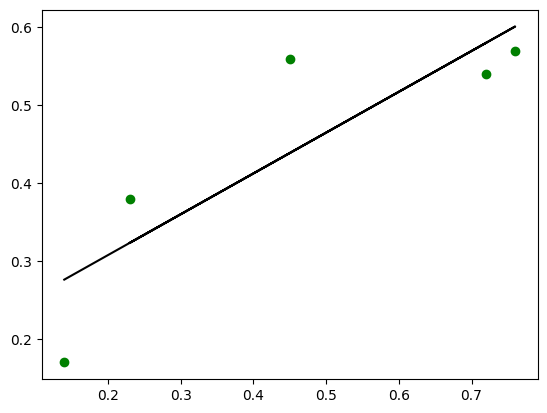

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from sklearn.linear_model import LinearRegression
%matplotlib inline

X = np.array([[0.72], [0.45], [0.23], [0.76], [0.14]])
y = np.array([0.54, 0.56, 0.38, 0.57, 0.17])

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')
plt.show()

In [ ]:
print('Для Х = 0.9, у = ', model.predict(np.array([[0.9]]))[0])
# y = mx + c
print('m =', model.coef_[0])
print('c =', model.intercept_)

Для Х = 0.9, у =  0.6745431309904153
m = 0.5239616613418531
c = 0.2029776357827475


In [ ]:
###########

Если линейную функцию представить с помощью уравнения прямой:

$y = mx + c$,

где $m$ - наклон кривой, а $c$ - отсечение по оси $y$, определяющее, в какой точке прямая пересекает ось ординат.

Наклон $m$ и отсечение по вертикали $с$ — это параметры модели, и их
можно корректировать, чтобы подогнать модель под данные.

Уравнение прямой имеет непосредственное отношение к операции взвешенной суммы, которая используется в нейроне. В этом можно убедиться,
если записать параметры модели в виде весов $(c → w_0, m → w_1)$:

$y = (w_0 * 1) + (w_1 * x)$


Путем изменения любого из этих весов (или параметров модели) можно создавать разные прямые (разные линейные модели данных). Изменение отсечения $w_0$ по оси $y$ перемещает прямую по вертикали, а модификация наклона $w_1$ приводит к вращению прямой вокруг точки $(x = 0, y = отсечение)$.

Общее отклонение модели для заданного набора данных можно посчитать, сложив вместе все погрешности, которые она допускает для каждого образца. Для этого обычно используют формулу для вычисления так называемой среднеквадратической ошибки (англ, mean of squared errors, или MSE):
$$
MSE = \frac{1}{N} \sum_{j=1}^{n} (y_j-\hat{y_j})^2
$$


В этом уравнении $y_j$ — это правильное выходное значение для признака, указанное в наборе данных для соответствующего образца $j$, а $\hat{y_j}$ — это приблизительное целевое значение, возвращенное моделью для того же образца. Затем каждое из этих отклонений возводится в квадрат, и результаты складываются. Возведение в квадрат гарантирует, что все операнды положительные, а значит отклонения как в положительную, так и отрицательную сторону, внесут свой вклад в ошибку.  А вот умножение суммы отклонений на $\frac{1}{N}$ - имеет смысл нормировки. Чем меньше MSE функции, тем лучше она моделирует данные. Следовательно, сумму квадратов ошибок можно использовать в качестве меры приспособленности потенциальной функции (в нашем случае это модель прямой) для
оценки того, насколько хорошо она соответствует данным.

Проанализируем графики зависимости MSE линейной модели от параметров $w_0$ и $w_1$.

In [ ]:
from sklearn.metrics import mean_squared_error # Импортируем готовую функцию для MSE

In [ ]:
X = np.array([[0.72], [0.45], [0.23], [0.76], [0.14]])
y = np.array([0.54, 0.56, 0.38, 0.57, 0.17])
y_pred = model.predict(X) # предсказанные значения

In [ ]:
mean_squared_error(y, y_pred)

0.00635805750798722

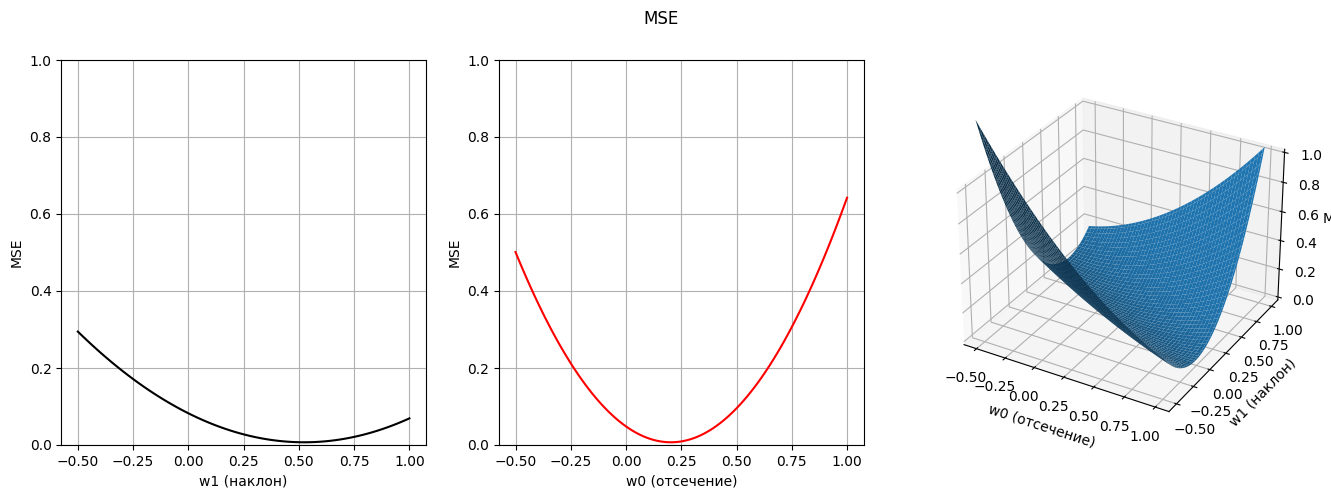

In [ ]:
X = np.array([[0.72], [0.45], [0.23], [0.76], [0.14]])
y = np.array([0.54, 0.56, 0.38, 0.57, 0.17])


w = np.linspace(-0.5, 1, 100)

# Фиксируем w0
y1 = np.outer(w, X) + model.intercept_

# Фиксируем w1
y2 = np.outer(model.coef_[0] * np.ones(w.shape[0]), X) + np.array([w, w, w, w, w]).T # Суммировать матрицы можно только одинаковой размерности

def MSE(w1, w0):
    return mean_squared_error(y, w1 * X + w0)


vectorized_mse = np.vectorize(MSE) # Определяем, что функция применяется к каждому элемента NumPy

X_3d, Y_3d = np.meshgrid(w, w) # Строим 2D сетку
Z_3d = vectorized_mse(X_3d, Y_3d) # Для каждой точки сетки просчитываем MSE

fig = plt.figure(figsize=(16,5))
fig.suptitle('Стоимость (MSE)')

ax = fig.add_subplot(1, 3, 1)
ax.plot(w, [mean_squared_error(y,  np.array(y_w)) for y_w in y1] , color='k')
ax.grid(True)
ax.set_ylabel('MSE')
ax.set_xlabel('w1 (наклон)')
ax.set_ylim(0, 1)

ax = fig.add_subplot(1, 3, 2)
ax.plot(w, [mean_squared_error(y,  np.array(y_w)) for y_w in y2] , color='r')
ax.grid(True)
ax.set_ylabel('MSE')
ax.set_xlabel('w0 (отсечение)')
ax.set_ylim(0, 1)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X_3d, Y_3d, Z_3d)
ax.set_zlim(0, 1)
ax.set_zlabel('MSE')
ax.set_xlabel('w0 (отсечение)')
ax.set_ylabel('w1 (наклон)')

plt.show()

In [ ]:
###########

У каждого параметра есть одно оптимальное значение, и чем дальше он от него отходит (в любую сторону), тем больше отклонение модели.

В результате график изменения погрешности модели в зависимости от каждого параметра принимает вогнутую (чашеобразную) форму.

Если нарисовать график зависимости отклонения модели от обоих параметров, получится трехмерная вогнутая поверхность (график справа), известная как поверхность ошибки.

Перемещение по плоскому пространству весов ($w_0$, $w_1$) эквивалентно переходу между разными моделями.

Координаты пространства весов, соответствующие нижней точке поверхности ошибок, определяют линейную модель с наименьшей MSE для заданного набора данных (то есть
линейную модель, которая лучше всего подходит для этих данных).

Форма поверхности ошибок на графике, говорит о том, что у этого набора данных есть всего одна оптимальная линейная модель, так как на дне чаши находится одна координата с наименьшей высотой (ошибкой). Удаляясь от этой модели (путем изменения ее весов), мы обязательно получаем большую MSE.

В разных алгоритмах могут использоваться различные функции ошибок (мы, например взяли MSE), поэтому, чтобы не акцентировать внимание на какой-то конкретной функции, часто в литературе говорят просто как о *стоимости*.  

Вогнутая, или чашеобразная, поверхность ошибок чрезвычайно полезна при формировании линейной функции для моделирования набора данных, поскольку процесс обучения можно свести к поиску нижней точки на этой поверхности.

**Стандартный алгоритм, который используется в этом поиске, называется градиентным спуском.**

Вначале алгоритм градиентного спуска инициализирует модель с помощью набора весов, подобранного случайным образом. Затем вычисляется стоимость этой случайно инициализированной модели. Вместе эти веса и стоимость определяют исходную точку поиска на поверхности ошибок. Модель, инициализированная случайным образом, с очень высокой долей вероятности покажет плохие результаты, поэтому поиск, скорее всего, начнется на возвышенном участке поверхности ошибок. Однако это плохое начало не является препятствием, так как в процессе поиска можно будет найти лучшее сочетание весов, следуя градиенту, спускающемуся по поверхности ошибок, пока не будет достигнута нижняя точка этой поверхности (место, отдаление от которого в любом направлении приводит к увеличению стоимость).

Вот почему этот алгоритм называют градиентным спуском: градиент, по которому он спускается, — это градиент модели на поверхности ошибок относительно данных.
Важно здесь то, что переход от исходной позиции к дну происходит
не за одно обновление, а постепенно. На каждой итерации текущие веса обновляются таким образом, чтобы перейти в ближайшую точку пространства весов с меньшей стоимостью (ошибкой). На достижение дна поверхности ошибок может уйти много итераций.

Представьте себе туриста, который очутился на склоне холма, окутанного густым туманом. Его машина припаркована на дне долины, но из-за тумана он может видеть лишь на расстоянии нескольких метров в любом направлении. Если предположить, что долина имеет гладкую вогнутую форму, турист может найти путь к своей машине, даже несмотря на туман. Для этого он может шаг за шагом спускаться с холма, следуя локальному градиенту в своей текущей позиции. Отдельное прохождение поиска методом градиентного спуска проиллюстрировано на нижнем графике.

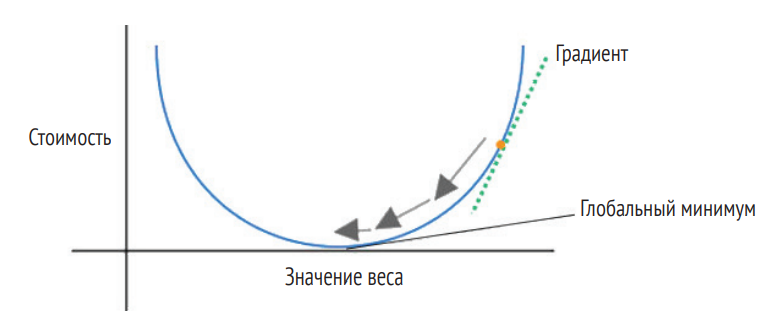

>**Что такое градиент для математиков?**
Градиент – это обобщение производной функции одной переменной на многомерный случай. Он представляется в виде вектора $n$ частных производных функции $f$.
Понятие градиента полезно в  оптимизации, поскольку он указывает направление
наибольшей скорости изменения функции, измеряемой как крутизна поверхности
графика в этом направлении.
В методе градиентного спуска наклон функции потерь вычисляется путем взятия производной. Если функция потерь зависит от одной переменной, то производная в  некоторой точке параболы равна тангенсу угла наклона касательной к параболе в этой точке, т. е. отношению изменения $y$ к изменению $x$. (Из тригонометрии мы знаем, что тангенс угла прямоугольного треугольника равен отношению противолежащего катета к прилежащему).
Наклон в каждой точке на кривой равен тангенсу угла наклона касательной в этой
точке. Как найти эту величину? Мы берем две близко расположенные точки на кривой, вычисляем тангенс угла наклона соединяющей их прямой, а затем уменьшаем
расстояние между ними, устремляя его к нулю. В анализе это называется пределом.
Процесс измерения потери и изменения веса на каждом шаге в направлении уменьшения ошибки повторяется, пока не будет достигнута точка, в которой дальнейшее уменьшение невозможно. Процесс останавливается в минимуме. Если функция потерь выпуклая (типичный случай в линейном моделировании), то она имеет единственный глобальный минимум.

In [ ]:
###########

Важнейшим элементом алгоритма градиентного спуска является правило, которое определяет, как нужно обновлять веса на каждой итерации. Чтобы понять, как оно описывается, нужно сначала отметить, что поверхность ошибок состоит из нескольких градиентов. В нашем простом примере она сформирована на основе двух кривых. Одна кривая определяется зависимостью от $w_0$, другая от $w_1$.

Тот факт, что поверхность ошибок состоит из разных кривых, каждая из которых обладает собственным градиентом, важен, так как алгоритм градиентного спуска продвигается вниз путем независимого обновления отдельных весов, стремясь уменьшить высоту на кривой ошибок, связанных с соответствующим весом.

Иными словами, в ходе одной итерации алгоритма градиентного спуска $w_0$ обновляется для продвижения вниз по кривой ошибок $w_0$, а обновление $w_1$ направлено на то, чтобы спуститься по кривой ошибок $w_1$. Более того, величина,
на которую изменяется каждый вес в ходе одной итерации, зависит от крутизны
градиента его кривой ошибок, и этот градиент варьируется от одной итерации
к другой по мере спуска. Например, $w_0$ существенно обновляется на итерациях, в которых процесс поиска находится высоко по любую сторону от минимума, но ближе к нижней точке кривой ошибок $w_0$ этот процесс замедляется.

Математический анализ и, в частности, дифференцирование — это раздел математики, который имеет дело со скоростью изменений. Например, для получения производной функции $y = f(х)$ нужно вычислить, насколько быстро $y$ меняется в зависимости от $x$. Более того, если функция принимает несколько входных значений $[y = f(x_1, ..., х_n)]$, мы можем посчитать скорость изменения ее вывода, $y$, в зависимости от изменения каждого из $x_i$, для этого в каждой входной точке берется частная производная.

Частная производная функция по отношению к отдельному входному значению вычисляется в два этапа: сначала предполагается, что все остальные входные значения остаются неизменными (то есть скорость их изменения равна 0, что исключает их из уравнения), а затем берется производная от того, что осталось.

Частная производная MSE по весу определяет то, как меняется вывод MSE в зависимости от веса — то есть градиент кривой ошибок этого веса. Это именно то, что нужно для определения правила обновления весов методом градиентного спуска: частная производная MSE по весу определяет, как вычисляется градиент кривой ошибок веса, а этот градиент, в свою очередь, говорит о том, насколько нужно обновить вес, чтобы уменьшить отклонение (вывод MSE).

Вот почему каждый вес в алгоритме градиентного спуска обновляется по отдельности: правило обновления веса зависит от частной производной MSE
по этому весу, и, поскольку у каждого веса своя производная, правила обновления у них тоже разные. И опять, несмотря на эти отличия, все производные имеют одинаковую форму, поэтому правила обновления весов будут иметь аналогичный вид. Это упрощает определение алгоритма градиентного спуска. Еще одна особенность, которая делает этот процесс более простым, состоит в том, что MSE вычисляется относительно набора данных с $n$ образцами. Это важно, поскольку переменными в MSE выступают только веса; целевой вывод $y$ и ввод $x$ определяются в наборе данных для каждого образца, поэтому их можно считать константами. Благодаря этому при вычислении частной производной MSE по весу многие члены уравнения, которые не включают в себя веса, можно отбросить, так как мы считаем, что они не меняются.

Отношение между выводом MSE и каждым весом становится более прозрачным, если в определении MSE вместо члена $\hat{y_j}$, обозначающего результат, предсказанный моделью, подставить структуру модели, генерирующей это предсказание. Например, если взять модель с одним вводом $x$: и фиктивным
входным значением $x_0 = 1$, эта переписанная версия MSE будет выглядеть так:

$$
MSE = \frac{1}{N} \sum_{j=1}^{n} (y_j-(w_0 * x_{j,0}+w_1*x_{j,1}))^2
$$


В этом уравнении входные переменные имеют двойной индекс: первая его часть, j, обозначает образец (или строку в наборе данных), а второй определяет признак (или столбец в наборе данных) ввода. Например, $x_{j,1}$ относится к признаку 1 в образце j. Это определение MSE можно обобщить до модели с m входными значениями:

$$
MSE = \frac{1}{N} \sum_{j=1}^{n} (y_j-( \sum_{i=0}^{m}w_i*x_{j,i}))^2
$$


Часто в литературе, вы можете наблюдать, что вместо MSE используют SSE (ошибка суммы квадратов деленная на 2). Это делается для того, чтобы получить частные производные без дополнительного множителя $\frac{2}{N}$:

$$
\frac{\partial MSE}{\partial w_i} = \frac{2}{N} \sum_{j=1}^{n} \biggl((y_j- \hat{y_j}) * (-x_{j,i})\biggr)
$$

или

$$
\frac{\partial SSE}{\partial w_i} = \sum_{j=1}^{n} \biggl((y_j- \hat{y_j}) * (-x_{j,i})\biggr)
$$

где $(y_j - \hat{y_j})$ - отклонение вывода взвешенной суммы, $x_{j,i}$ - скорость изменения взвешенной суммы в зависимости от $w_i$.

Эта частная производная определяет, как вычислить градиент ошибок для веса $w_i$ в наборе данных, в котором $x_{j,i}$ — это ввод, относящийся к весу
$w_i$ при обработке каждого образца в наборе. В ходе этого процесса умножаются два члена: отклонение вывода и скорость изменения вывода (то есть взвешенная сумма) в зависимости от веса. На эту формулу можно посмотреть следующим образом: если при изменении веса существенно меняется вывод взвешенной суммы, градиент ошибок по отношению к весу будет большим (резким), так как изменение веса сильно влияет на отклонение. Однако этот градиент является восходящим, а мы хотим двигаться вниз по кривой ошибок.
Поэтому в правиле обновления весов методом градиентного спуска знак «-» перед $x_{j,i}$ опускается. Обычно итерацию обозначают буквой $t$, тогда правило обновления весов для n образцов можно записать так:

$$
w_i^{t+1} = w_i^t + \biggl[ɳ*\sum_{j=1}^{n} \biggl((y_j^t - \hat{y_j^t}) * x_{j,i}^t \biggr)\biggr]
$$

где ɳ - гиперпараметр скорости обучения.

У этого правила обновления весов есть ряд интересных особенностей.

Во-первых, оно определяет, как вес $w_i$ должен обновляться после $t$-го прохождения по набору данных. Это обновление прямо пропорционально градиенту
кривой ошибок для этого веса на этой итерации (то есть сложению, которое
на самом деле определяет частную производную SSE по этому весу).

Во-вторых, с помощью этого правила можно обновлять веса для функций с несколькими входными значениями. Это означает, что алгоритм градиентного спуска подходит для прохождения вниз по поверхностям ошибок с более чем двумя координатами весов. Такие поверхности невозможно изобразить, поскольку у них больше трех измерений, но основные принципы спуска по поверхности ошибок с помощью градиента можно обобщить в виде алгоритма обучения с несколькими вводами.

В-третьих, несмотря на то, что правило обновления весов имеет похожую структуру для каждого веса, оно определяет разные изменения на каждой итерации, так как зависит от входных значений образцов набора данных, к которым применяются веса.

В-четвертых, операция сложения говорит о том, что на каждой итерации алгоритма градиентного спуска текущую модель нужно применять ко всем n образцам в наборе данных.

Это одна из причин, почему обучение глубокой сети требует так много вычислительных ресурсов. Обычно крупные наборы данных разбиваются на части,
и каждая итерация обучения основывается на отдельной части, а не на всем
наборе.


Правило обновления весов довольно легко применить к обучению отдельного нейрона. В этом случае $w_0$ — это сдвиг нейрона, а остальные веса относятся к другим его входным значениям. Вычисление частной производной SSE зависит от структуры функции, которая генерирует $у$. Чем сложнее эта функция, тем сложнее становится частная производная. Тот факт, что функция, которую определяет нейрон, включает в себя как взвешенную сумму, так и функцию активации, означает: частная производная SSE по весу нейрона будет сложнее частной производной, приведенной выше. Наличие функции активации добавляет в нее еще один член — частную производную функцию активации по выводу функции взвешенной суммы. Это вызвано тем, что данный вывод подается на вход функции активации. Последняя не принимает вес напрямую. Изменения веса влияют на ее вывод опосредованно, через обновление взвешенной суммы.
Логистическое уравнение так широко и долго применялось в качестве функции активации в нейронных сетях именно потому, что оно имеет очень простую производную по своим входным значениям. Правило обновления весов методом градиентного спуска для нейрона с логистической функцией выглядит так:

$$
w_i^{t+1} = w_i^t + \biggl[ɳ*\sum_{j=1}^{n} \biggl((y_j^t - \hat{y_j^t}) * (\hat{y_j^t} * (1-\hat{y_j^t})) * x_{j,i}^t \biggr)\biggr]
$$

где $(\hat{y_j^t} * (1-\hat{y_j^t}))$ - производная логистической функции по взвешенной сумме.

То, что правило обновления весов включает производную функцию активации, означает: оно будет меняться вместе с этой функцией. Однако это изменение будет заключаться всего лишь в обновлении ее производной, а общая структура правила останется неизменной.

Это расширенное правило обновления весов показывает, что алгоритм
градиентного спуска можно использовать для обучения отдельного нейрона.

При этом с его помощью нельзя обучать многослойные нейронные сети, так как определение градиента ошибок для отдельно взятого веса зависит от погрешности функции $(y_j - \hat{y_j})$. И хотя мы можем вычислить отклонение вывода нейрона в выходном слое сети, сравнив напрямую этот вывод с ожидаемым результатом, это невозможно сделать для нейрона в скрытом слое. Поэтому мы не можем определить градиенты ошибок для каждого веса. Для решения этой проблемы можно воспользоваться алгоритмом обратного распространения.


In [ ]:
###########

### Обучение нейронной сети с использованием обратного распространения

У термина «обратное распространение» есть два разных значения.

Первое и главное состоит в том, что это алгоритм, с помощью которого можно вычислить чувствительность (градиент, или скорость изменения) отклонения сети к изменениям весов каждого ее нейрона. Получив градиент ошибок для веса, мы можем отрегулировать этот вес, чтобы уменьшить общее отклонение сети.

Для этого используется правило обновления весов, похожее на то, которое основано на градиентном спуске. В этом смысле алгоритм обратного распространения является решением задачи присваивания коэффициентов доверия. В то же время он выступает полноценным алгоритмом для обучения нейронной сети. Это второе значение вбирает в себя первое, но также включает правило обучения, определяющее, как следует использовать градиенты ошибок для обновления весов внутри сети.

Следовательно, согласно этому второму значению, данный алгоритм состоит из двух этапов: сначала он решает задачу присваивания коэффициентов доверия, а затем использует градиенты ошибок, вычисленные в ходе решения этой задачи,
для обновления весов в сети.

Эти два значения следует различать, поскольку существует целый ряд разных правил обучения, которые позволяют обновлять веса после назначения коэффициентов доверия. Самым распространенным правилом обучения, которое применяется при обратном распространении, является алгоритм градиентного спуска, представленный ранее. Здесь мы уделяем основное внимание первому значению, согласно которому данный алгоритм решает задачу присваивания коэффициентов доверия.

### Алгоритм

Алгоритм обратного распространения начинается с инициализации всех весов сети с помощью произвольных значений. Стоит отметить, что даже сеть, инициализированная случайным образом, способна генерировать вывод в ответ на поступающий ввод, хотя отклонение этого вывода, скорее всего, будет большим.

После инициализации можно приступить к обучению сети, постепенно обновляя ее веса так, чтобы уменьшить отклонение; последнее вычисляется как разница между выводом, который сеть генерирует в ответ на входную закономерность, и ожидаемым выводом, определенным в учебном наборе данных. Ключевым аспектом этого процесса является решение задачи присваивания коэффициентов доверия — то есть вычисление градиентов ошибок для каждого веса в сети. Алгоритм обратного распространения делает это в два этапа. В ходе первого, известного как прямой проход,
на вход сети подается закономерность, и активации нейронов двигаются вперед, пока не будет сгенерирован вывод. Что можно увидеть на рисунке.

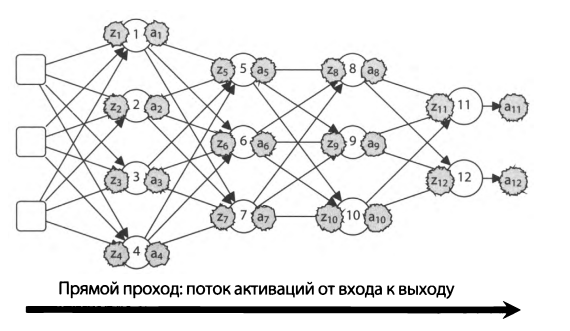

Рис. 1. Прямой проход алгоритма обратного распространения


Здесь вы можете видеть взвешенную сумму входных значений, вычисляемую
для каждого нейрона (например, $z_1$ представляет взвешенную сумму вводов
для нейрона 1), и получаемый при этом вывод ($а_1$ - обозначает активацию нейрона 1). Присутствие значений $z_i$ и $a_i$ на рисунке подчеркивает тот факт, что в ходе прямого прохождения оба эти значения (для каждого нейрона) сохраняются в памяти.

Это делается для того, чтобы позже использовать их в обратном прохождении алгоритма. С помощью значения $z_i$ вычисляется величина изменения весов для входных соединений нейрона. А значение $а_i$ позволяет посчитать величину изменения весов для выходных соединений.

Второй этап, известный как обратное прохождение, начинается с вычисления градиента ошибок для каждого нейрона в выходном слое. Эти градиенты представляют, насколько сильно отклоняется сеть в ответ на изменения
во взвешенной сумме нейрона, и в качестве их сокращенного обозначения
часто используют $δ$ (произносится как «дельта») с индексом, обозначающим нейрон. Например, $δ_k$ — это градиент ошибок сети в ответ на незначительные изменения во взвешенной сумме нейрона $k$. Необходимо понимать, что в алгоритме обратного распространения вычисляются два разных градиента ошибок:

* Первый — это значение $δ$ для каждого нейрона, представляющее собой
скорость изменения погрешности сети в ответ на обновления взвешенной суммы нейрона. У каждого нейрона своя $δ$. Именно эти градиенты ошибок алгоритм распространяет в обратном направлении.
* Второй — это градиент ошибок сети с учетом изменения ее весов.
У каждого веса в сети есть один такой градиент. Эти градиенты используются для обновления весов. Но, прежде чем их вычислять, необходимо сначала получить $δ$ каждого нейрона (с помощью обратного распространения).

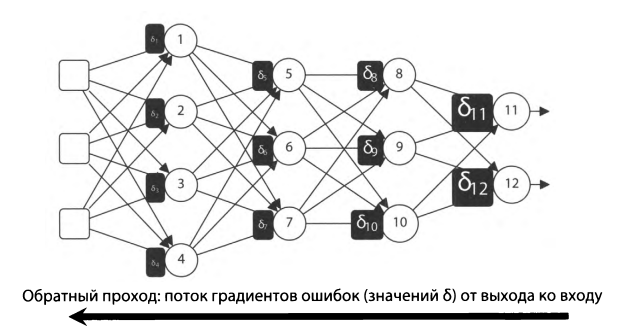

Рис. 2. Обратный проход алгоритма обратного распространения


Обратите внимание на то, что у каждого нейрона есть только одна дельта,
но при этом у него может быть много разных весов. Таким образом, значение
$δ$ можно применять для вычисления сразу нескольких градиентов ошибок.
После получения дельт для выходных нейронов вычисляются значения $δ$
для нейронов в последнем скрытом слое. Для этого часть дельты каждого выходного нейрона присваивается каждому скрытому нейрону, который с ним соединен.

Это коэффициенты доверия, которые зависят от весов на соединениях между выходным и скрытым нейронами, а также от активации скрытого нейрона во время прямого прохождения (вот почему они записываются в память). После назначения коэффициентов доверия вычисляется дельта каждого нейрона в последнем скрытом слое; для этого слагаются части дельт, присвоенные нейрону всеми выходными нейронами, с которыми он соединен. Затем тот же процесс повторяется для передачи градиента ошибок из последнего скрытого слоя в предпоследний и дальше, вплоть до входного слоя.

Именно из-за этого обратного распространения дельт по сети данный алгоритм и получил свое название. В конце обратного прохода для каждого нейрона сети вычисляется $δ$ (то есть задача присваивания коэффициентов доверия решена), и затем эти значения используются для обновления весов сети (например, с помощью алгоритма градиентного спуска, описанного ранее).
Обратный проход алгоритма проиллюстрирован на рис. 2. Как видно, чем дальше процесс обратного распространения уходит от выходного слоя, тем меньше становятся дельты. Это следствие проблемы исчезающего градиента, которая замедляет темпы обучения начальных слоев сети.





In [ ]:
###########

#### **Подведем итоги.**

Каждая итерация алгоритма обратного распространения состоит из следующих основных шагов:
* Сеть принимает ввод и позволяет активациям нейронов проходить прямо, пока не будет сгенерирован вывод. При этом записывается как взвешенная сумма, так и активация каждого нейрона.
* Для каждого нейрона в выходном слое вычисляется градиент ошибок ($\delta$ или дельта).
* Градиенты ошибок передаются в обратном направлении, чтобы получить дельту каждого нейрона в сети.
* Значения $\delta$ и алгоритм обновления весов (например, алгоритм градиентного спуска) используются, чтобы вычислить градиенты ошибок для весов сети. Затем происходит обновление весов с помощью этих градиентов.

Алгоритм продолжает повторять эти шаги до тех пор, пока отклонение
сети не достигнет приемлемого уровня (или пока сеть не сойдется).

### Передача дельт в обратном направлении

Член δ в уравнении нейрона представляет градиент ошибок сети относительно
изменения взвешенной суммы входных значений, вычисляемой этим нейроном. Для более детализированного представления в верхней части рис. 3 показаны вычислительные этапы внутри нейрона $k$, где $z_k$ - обозначает величину соответствующей взвешенной суммы. На этой диаграмме нейрон принимает
ввод (или активации) от трех других нейронов $(h, i, j)$, и $z_k$ — это взвешенная сумма их активаций. Затем, чтобы вычислить вывод нейрона, $а_к$, значение $z_k$ пропускается через нелинейную функцию активации, $𝞿$, такую как логистическое уравнение. Таким образом, $\delta$ в нейроне $k$ — это скорость изменения отклонения сети в ответ на небольшие колебания значения $z_k$. В математическом смысле это частная производная отклонения сети относительно $z_k$:
$$
δ_k = \frac {∂Error}{∂z_k}
$$


В каком бы месте сети ни находился нейрон (в выходном или скрытом слое), его дельта является произведением двух значений:

* скорости изменения отклонения сети в ответ на колебания активации
(вывода) нейрона: $∂E/∂a_k$;

* скорости изменения активации нейрона в ответ на обновление взвешенной суммы входных значений нейрона:  $∂a_k /∂z_k$.

А теперь все вместе:

$$
\delta_k = \frac {∂E}{∂a_k} * \frac {∂a_k}{∂z_k}
$$

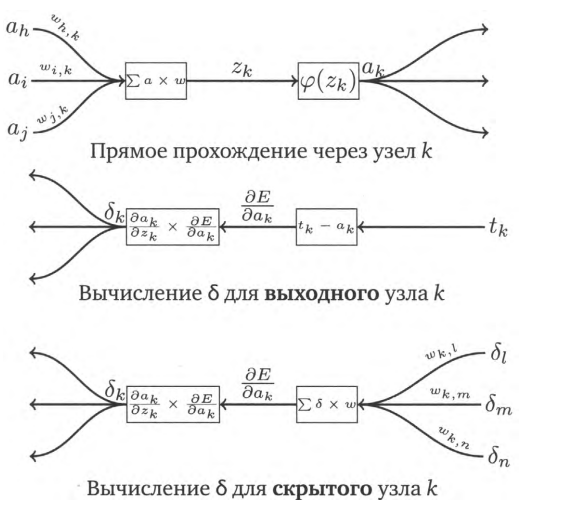

Рис. 3. Диаграмма обратного распространения ошибки

В средней части рис. 3 показано, как это произведение вычисляется для
нейронов в выходном слое сети. Сначала нужно посчитать скорость изменения отклонения сети по отношению к выводу нейрона $∂E/∂a_k$. Чем больше
разница между фактической и ожидаемой активациями нейрона ($a_k$ и $t_k$) , тем
быстрее будет меняться отклонение при обновлении вывода нейрона. Поэтому скорость изменения отклонения сети с учетом колебаний активации выходного нейрона к можно посчитать, вычитая фактический вывод нейрона ($а_к$) из ожидаемого ($t_k$):

$$
\frac {∂E}{∂a_k} = t_k-a_k
$$

Это значение привязывает отклонение сети к выводу нейрона. Однако дельта нейрона ( $\delta$ ) — это скорость изменения отклонения в ответ на ввод
функции активации ($z_k$), а не на ее вывод ($а_к$).
Следовательно, чтобы получить $\delta$ нейрона, значение $∂E/∂a_k$ должно пройти обратно через функцию активации. Для этого $∂E/∂a_k$ следует умножить на скорость изменения функции активации по отношению к ее входному значению $z_k$.

На рис. 3 скорость изменения функции активации относительно ее ввода обозначена как $∂a_k/∂z_k$.
Для вычисления этого отношения значение $z_k$ (сохраненное в результате прямого прохождения по сети) подставляется в уравнение производной функции активации относительно $z_k$. Например, производная логистического уравнения по отношению к его вводу выглядит так:

$$
\frac {∂logistic(z)}{∂z} = logistic(z)* \left(1-logistic(z) \right)
$$

Поскольку для получения дельты нейрона нужно выполнить произведение, которое включает в себя производную его функции активации, необходимо, чтобы эта производная поддавалась вычислению. Мы не можем взять производную от пороговой функции активации, поскольку в точке порога присутствует разрыв. В итоге алгоритм обратного распространения не подходит для сетей, нейроны которых активируются с помощью пороговых функций. Это одна из причин, почему вместо этих функций в нейронных сетях начали использовать логистическое уравнение и tanh — обе эти функции имеют очень простые производные, поэтому отлично подходят для обратного распространения.

В нижней части рис. 3 проиллюстрирован процесс вычисления $\delta$ для
нейрона в скрытом слое. Здесь применяется произведение тех же значений,
что и в выходных нейронах. Отличие заключается в том, что $∂E/∂a_k$ сложнее вычислить для скрытых модулей. Мы не можем привязать вывод скрытого нейрона непосредственно к отклонению сети, так как эти две величины связаны лишь косвенно. Эта связь выражается в изменении активации последующих нейронов, которые принимают на вход вывод скрытых нейронов, и величина этих изменений зависит от веса, который применяется к выводу каждым последующим нейроном. К тому же это косвенное влияние на отклонение сети зависит от того, как на данное отклонение воздействуют последующие нейроны (то есть их значения $\delta$). Следовательно, чувствительность отклонения сети к выводу скрытого нейрона можно вычислить как взвешенную сумму значений $\delta$ тех нейронов, которые находятся сразу за ним:

$$
\frac {∂E}{∂a_k} = \sum_{i=1}^{n} w_{k,i}*\delta_i
$$

Таким образом, прежде чем мы сможем получить $∂E/∂a_k$ для нейрона $k$, необходимо вычислить отклонения (значения $\delta$) всех последующих нейронов, которым тот передает свой вывод. Но это не составляет труда, поскольку мы движемся в обратном направлении, поэтому значения $\delta$ последующих нейронов будут получены еще до достижения нейрона $к$.
Для скрытых нейронов вычисляется другой член произведения $\delta$, а именно $∂a_k/∂z_k$.
Это делается точно так же, как и в случае с выходными нейронами: значение $z_k$ (взвешенная сумма входных значений нейрона, сохраненная в ходе
прямого прохождения по сети) подставляется в производную функции активации нейрона относительно $z_k$.

In [ ]:
###########

### Обновление весов

Основной принцип обновления весов, который используется в алгоритме обратного распространения, состоит в том, что каждый вес в сети должен изменяться прямо пропорционально чувствительности общего отклонения сети к изменениям этого веса. Очевидно, что если изменение веса не влияет на общее отклонение сети, эти две величины являются независимыми, поэтому вес не сказывается на величине отклонения. Чтобы определить зависимость отклонения сети от изменения отдельных весов, следует измерять скорость его изменения в ответ на обновления веса.

Общее отклонение сети — это функция с несколькими входными значениями, в число которых входит как ввод сети, так и все ее веса. Поэтому скорость изменения этой величины в ответ на обновление заданного веса вычисляется с помощью частной производной отклонения по этому весу.

В алгоритме обратного распространения для вычисления этой частной производной используется дифференцирование.

Например, если взять вес $w_{j,k}$ на соединении между нейронами $j$ и $k$, частная производная отклонения сети будет представлять собой произведение двух значений:
1. Cкорости изменения взвешенной суммы вводов нейрона $k$ в зависимости от обновления веса $∂z_k/∂w_{j,k}$;
2. Cкорости изменения отклонения сети в ответ на изменение взвешенной суммы вводов, вычисленной нейроном $k$ (этот второй множитель обозначается как $δ_k$).


$$
\underbrace{a_j \xrightarrow[]{w_{j,k}}\overbrace{ \underbrace{\sum a_j * w_{j,k} \xrightarrow[]{z_k}}_{∂z_k/∂w_{j,k}}𝞿(z_k)}^{\text{Нейрон k}} \xrightarrow[]{w_{k,l}} \overbrace{\underbrace{\sum a_k * w_{k,l} \xrightarrow[]{z_l}}_{∂z_l/∂w_{k,l}}\underbrace{𝞿(z_l)}_{\delta_l}}^{\text{Нейрон l}}}_{∂Error/∂w_{j,k}} → Вывод
$$

Вычисления выше, могут показаться сложными, так как состоят из нескольких разных элементов. Но, как вы вскоре увидите, каждый из них в отдельности вычисляется довольно легко, а самое сложное здесь — не запутаться в порядке проведения вычислений.

Давайте сосредоточимся на $w_{k,l}$. Этот вес применяется к вводу выходного
нейрона. Между ним и выводом (отклонением) сети находятся два этапа:
взвешенная сумма, вычисляемая в нейроне $l$, и нелинейная функция, применяемая к этой сумме функцией активации нейрона $l$. Если начать с вывода
и двигаться в обратном направлении, то видно, что $\delta_l$ вычисляется с помощью уравнения, показанного на рис. 3: разница между целевой и фактической активациями нейрона умножается на частную производную функции активации этого нейрона по ее вводу (взвешенной сумме $z_k$), $∂a_l /∂z_l$. Если предположить, что в качестве функции активации нейрон l использует логистическое уравнение, для получения $∂a_l /∂z_l$ мы подставляем значение $z_l$ (сохраненное во время прямого прохождения алгоритма) в производную логистической функции:

$$
\frac{∂a_l}{∂z_l} = \frac{∂logistic(z_l)}{∂z_l} = logistic(z_l) * (1-logistic(z_l))
$$

Таким образом, если исходить из того, что нейрон $l$ использует логистическую функцию, формула $\delta_l$ выглядит так:
$$
\delta_l = logistic(z_l) * (1-logistic(z_l))*(t_l-a_l)
$$

Дельта $\delta_l$ привязывает отклонение сети к функции активации (взвешенной сумме $z_l$). Однако нам хотелось бы вновь привязать отклонение сети
к весу $w_{k,l}$. Для этого $\delta_l$ нужно умножить на частную производную функции взвешенной суммы по $w_{k,l}$: $∂z_k/∂w_{j,k}$. Эта частная производная описывает, как изменение $w_{k,l}$ влияет на вывод функции взвешенной суммы $z_l$. Поскольку это линейная функция от весов и активаций, следовательно, в частной производной по отдельному весу все члены, не зависящие от этого веса, обнуляются (то есть считаются константами). В результате остается всего лишь один ввод, связанный с этим весом, — в данном случае $a_k$:

$$
\frac{∂z_l}{∂w_{k,l}}=a_k
$$

Вот почему активации каждого нейрона сети сохраняются во время прямого прохождения. Вместе эти два выражения $∂z_k/∂w_{j,k}$ и $\delta_l$ привязывают
$w_{k,l}$ к отклонению сети: сначала вес связывается с $z_l$, а затем $z_l$ с функцией активации нейрона и, следовательно, с отклонением. Таким образом, градиент ошибок сети по отношению к изменениям веса w_{k,l} вычисляется так:

$$
\frac{∂Error}{∂w_{k,l}}=\frac{∂z_l}{∂w_{k,l}}*\delta_l = a_k*\delta_l
$$

На этапе обратного распространения (нижняя часть рис. 3) значение $\delta$ нейрона $к$ вычисляется с помощью следующего произведения:

$$
\delta_k = \frac{∂a_k}{∂z_k}*(w_{k,l}*\delta_l)
$$

Если предположить, что в качестве функции активации нейрон $к$ использует логистическое уравнение, отношение $∂a_k/∂z_k$ вычисляется аналогично
$∂a_l/∂z_l$, а именно, значение $z_k$ подставляется в уравнение производной логистической функции. Поэтому в развернутом виде вычисление $\delta_k$ будет выглядеть так:

$$
\delta_k = logistic(z_k) * (1-logistic(z_k))*(w_{k,l}*\delta_l)
$$

Но, чтобы привязать $w_{j,k}$ к отклонению сети $\delta_k$ следует умножить на частную производную функции взвешенной суммы по весу: $∂z_k/∂w_{j,k}$. Как уже описывалось выше, эта производная сокращает ввод, связанный с $w_{j,k}$ (то есть $а_j$, а градиент отклонения сети по отношению к скрытому весу $w_{j,k}$ вычисляется путем умножения $а_j$ на $\delta_k$. Следовательно, произведение этих членов ($∂z_k/∂w_{j,k}$ и $\delta_k$) создает цепочку, соединяющую $w_{j,k}$ и отклонение сети. В итоге, если нейрон использует логистическую функцию активации, произведение членов для $w_{j,k}$ будет таким:

$$
\frac{\partial Error}{\partial w_{j,k}} = \frac{\partial z_k}{\partial w_{j,k}}*\delta_k = a_j*\delta_k
$$

Здесь были рассмотрены вычисления в контексте очень простой сети с единственным маршрутом соединений. Однако они применимы и к более сложным сетям, поскольку вычисление дельт $δ$ для уже учитывает, что из нейрона может исходить множество соединений. Получив градиент отклонения сети по отношению к весу ( $∂Error/∂w_{j,k} = \delta_k * a_j$), мы можем откорректировать этот вес для уменьшения веса сети, используя правило обновления весов методом градиентного спуска.

В нем используются обозначения из обратного прохождения. Вес находится
на соединении между нейронами $j$ и $к$ во время итерации алгоритма $t$:

$$
w_{j,k}^{t+1} = w_{j,k}^{t} + (ɳ*\delta_k*a_j)
$$

Необходимо отметить, что важной проблемой при обучении нейронных сетей с помощью обратного распространения и градиентного спуска является существенное усложнение поверхности ошибок по сравнению с линейными моделями. Как мы уже видели, поверхность ошибок линейной модели имеет вид гладкой вогнутой чаши с одним глобальным минимумом (одно оптимальное сочетание весов). Однако поверхность ошибок нейронной сети больше напоминает горный хребет с несколькими впадинами и пиками. Это вызвано тем, что каждый нейрон сети при связывании
ввода и вывода использует нелинейную функцию, поэтому функция, реализуемая нейронной сетью, тоже является нелинейной. Эта нелинейность повышает выразительную силу сети с точки зрения того, насколько сложные функции она способна усваивать. Но ценой этого является более сложная поверхность ошибок, поэтому сочетание весов, составляющее ее минимум, не всегда можно найти с помощью алгоритма градиентного спуска: мы можем попросту застрять в локальном минимуме. Но, к счастью, обратное распространение и градиентный спуск часто находят сочетания весов, которые позволяют определять полезные модели, хотя для этого может потребоваться многократное выполнение процесса обучения, чтобы сеть исследовала разные участки поверхности ошибок.

На этом математическая часть урока завершена. Пора переходить к [практике](https://colab.research.google.com/drive/1Q8ioc9pkkaqGravu37C7jKw9OaG7cNL0).